In [ ]:
%pip install git+https://github.com/cheind/py-motmetrics.git

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
l = pickle.load( open( "trackastra_dfki_metrics.p", "rb" ) )

In [3]:
train_median_motp = sorted([x["motp"] for x in l if x["split"] == "train"])[74]
test_median_motp = sorted([x["motp"] for x in l if x["split"] == "test"])[32]

train_mean_motp = sum([x["motp"] for x in l if x["split"] == "train"]) / len([x["motp"] for x in l if x["split"] == "train"])
test_mean_motp = sum([x["motp"] for x in l if x["split"] == "test"]) / len([x["motp"] for x in l if x["split"] == "test"])

train_median_mota = sorted([x["mota"] for x in l if x["split"] == "train"])[74]
test_median_mota = sorted([x["mota"] for x in l if x["split"] == "test"])[32]

train_mean_mota = sum([x["mota"] for x in l if x["split"] == "train"]) / len([x["mota"] for x in l if x["split"] == "train"])
test_mean_mota = sum([x["mota"] for x in l if x["split"] == "test"]) / len([x["mota"] for x in l if x["split"] == "test"])

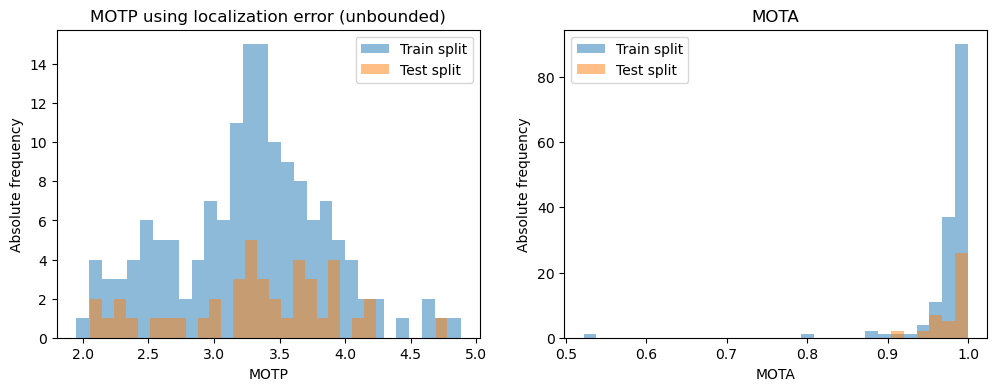

In [4]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax.flat[0].hist([x["motp"] for x in l if x["split"] == "train"], bins=30, alpha=0.5, label="Train split");
ax.flat[0].hist([x["motp"] for x in l if x["split"] == "test"], bins=30, alpha=0.5, label="Test split");
ax.flat[0].set_title("MOTP using localization error (unbounded)")
ax.flat[0].set_ylabel("Absolute frequency")
ax.flat[0].set_xlabel("MOTP")
ax.flat[0].legend()

import numpy as np
import matplotlib.pyplot as plt

train_mota = [x["mota"] for x in l if x["split"] == "train"]
test_mota = [x["mota"] for x in l if x["split"] == "test"]

global_min = min(min(train_mota), min(test_mota))
global_max = max(max(train_mota), max(test_mota))

bins = np.linspace(global_min, global_max, 31)

ax.flat[1].hist(train_mota, bins=bins, alpha=0.5, label="Train split")
ax.flat[1].hist(test_mota, bins=bins, alpha=0.5, label="Test split")
ax.flat[1].set_title("MOTA")
ax.flat[1].set_ylabel("Absolute frequency")
ax.flat[1].set_xlabel("MOTA")
ax.flat[1].legend()

plt.savefig("traccuracy_mota_motp.png")

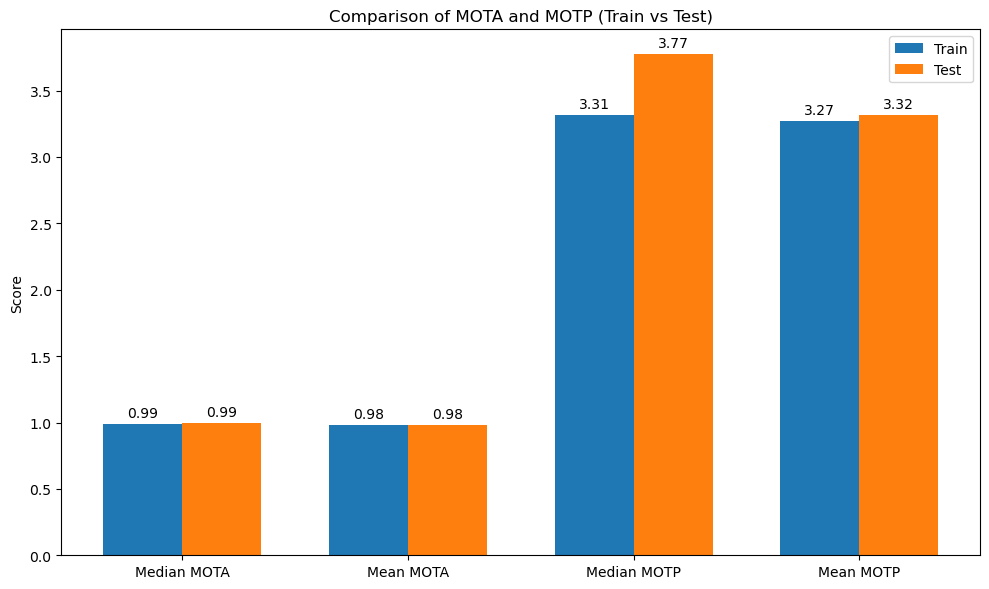

<Figure size 640x480 with 0 Axes>

In [5]:
# Define categories and values.
categories = ['Median MOTA', 'Mean MOTA', 'Median MOTP', 'Mean MOTP']

# Group the values for train and test.
train_values = [train_median_mota, train_mean_mota, train_median_motp, train_mean_motp]
test_values  = [test_median_mota,  test_mean_mota,  test_median_motp,  test_mean_motp]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels.
ax.set_ylabel('Score')
ax.set_title('Comparison of MOTA and MOTP (Train vs Test)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Optionally, annotate bars with their values.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

plt.savefig("traccuracy_bar.png")